In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF["PRICE"] = boston.target

print(bostonDF.shape)
bostonDF

(506, 14)


c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757
절편 값: 40.995595172164435
회귀 계수값: [-1.13000e-01  6.55000e-02  3.44000e-02  3.04590e+00 -1.97958e+01
  3.35500e+00  5.90000e-03 -1.74190e+00  3.55900e-01 -1.43000e-02
 -9.20200e-01  1.04000e-02 -5.66200e-01]


In [27]:
from sklearn.preprocessing import MaxAbsScaler

# 각 특성의 절대값이 0 과 1 사이가 되도록 스케일링합니다.
# 즉, 모든 값은 -1 과 1 사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler 와 같습니다.
# 이상치에 매우 민감합니다.

# 변형 객체 생성
maxabs_scaler = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxabs_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train_scaled = maxabs_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = maxabs_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = maxabs_scaler.inverse_transform(X_train_scaled)

X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X_test.columns)
y_train = pd.DataFrame(y_train)
y_train.reset_index(drop='index', inplace=True)
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop='index', inplace=True)

In [28]:
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002989,0.00,0.249099,0.0,0.514351,0.638041,0.620,0.502016,0.125000,0.327707,0.844340,1.000000,0.426653
1,0.009870,0.00,0.293439,0.0,0.617681,0.652278,0.695,0.313075,0.166667,0.431786,0.990566,0.985009,0.297077
2,0.007264,0.20,0.143115,0.0,0.742824,0.856492,0.894,0.176457,0.208333,0.371308,0.613208,0.978508,0.191204
3,0.000826,0.00,0.430065,0.0,0.657865,0.794533,0.910,0.178741,0.041667,0.383966,0.990566,1.000000,0.148538
4,0.001246,0.00,0.389690,0.0,0.474168,0.690774,0.078,0.436012,0.166667,0.428973,0.905660,0.984908,0.145378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.001720,0.25,0.184932,0.0,0.520092,0.770159,0.434,0.658137,0.333333,0.399437,0.929245,0.996674,0.250198
350,0.049959,0.00,0.652487,0.0,0.669346,0.718907,0.519,0.329172,1.000000,0.936709,0.952830,0.979138,0.278641
351,1.000000,0.00,0.652487,0.0,0.779564,0.678474,1.000,0.148650,1.000000,0.936709,0.952830,0.041446,0.543060
352,0.000273,0.95,0.096611,0.0,0.477727,0.915034,0.319,0.422051,0.166667,0.315049,0.693396,0.984001,0.075849


C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_15092\3722451924.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_15092\3722451924.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

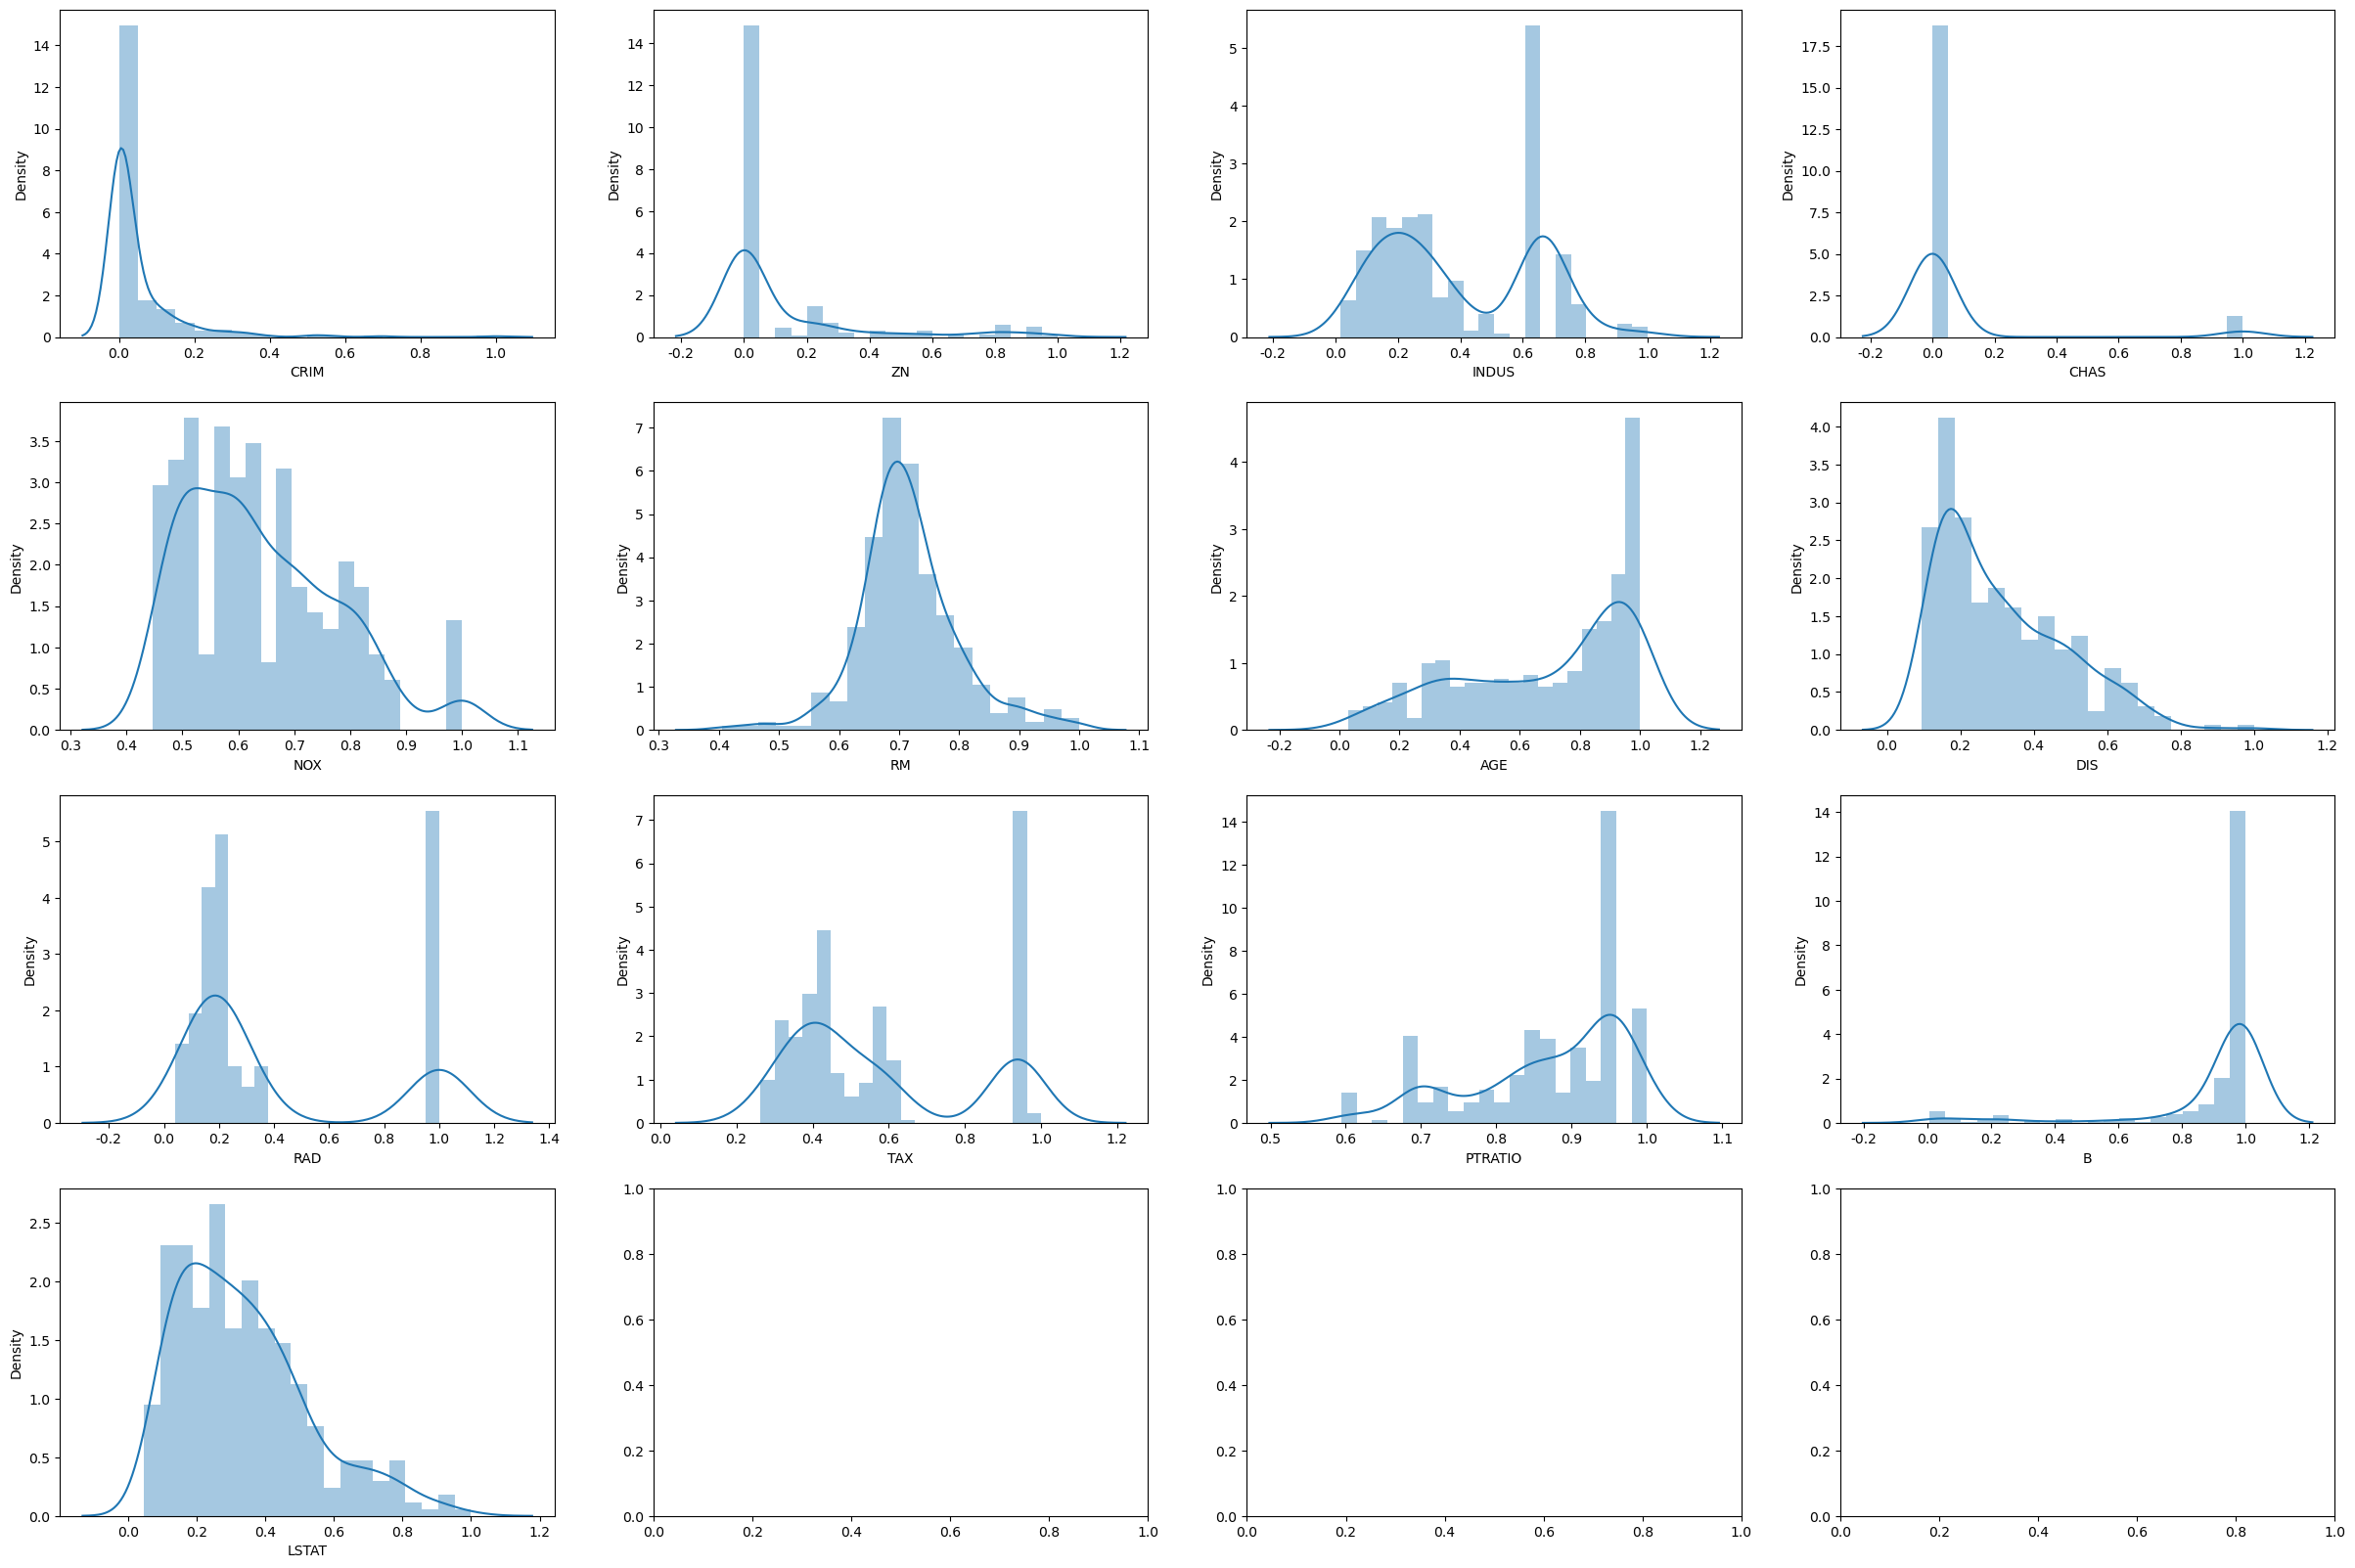

In [29]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    sns.distplot(X_train_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


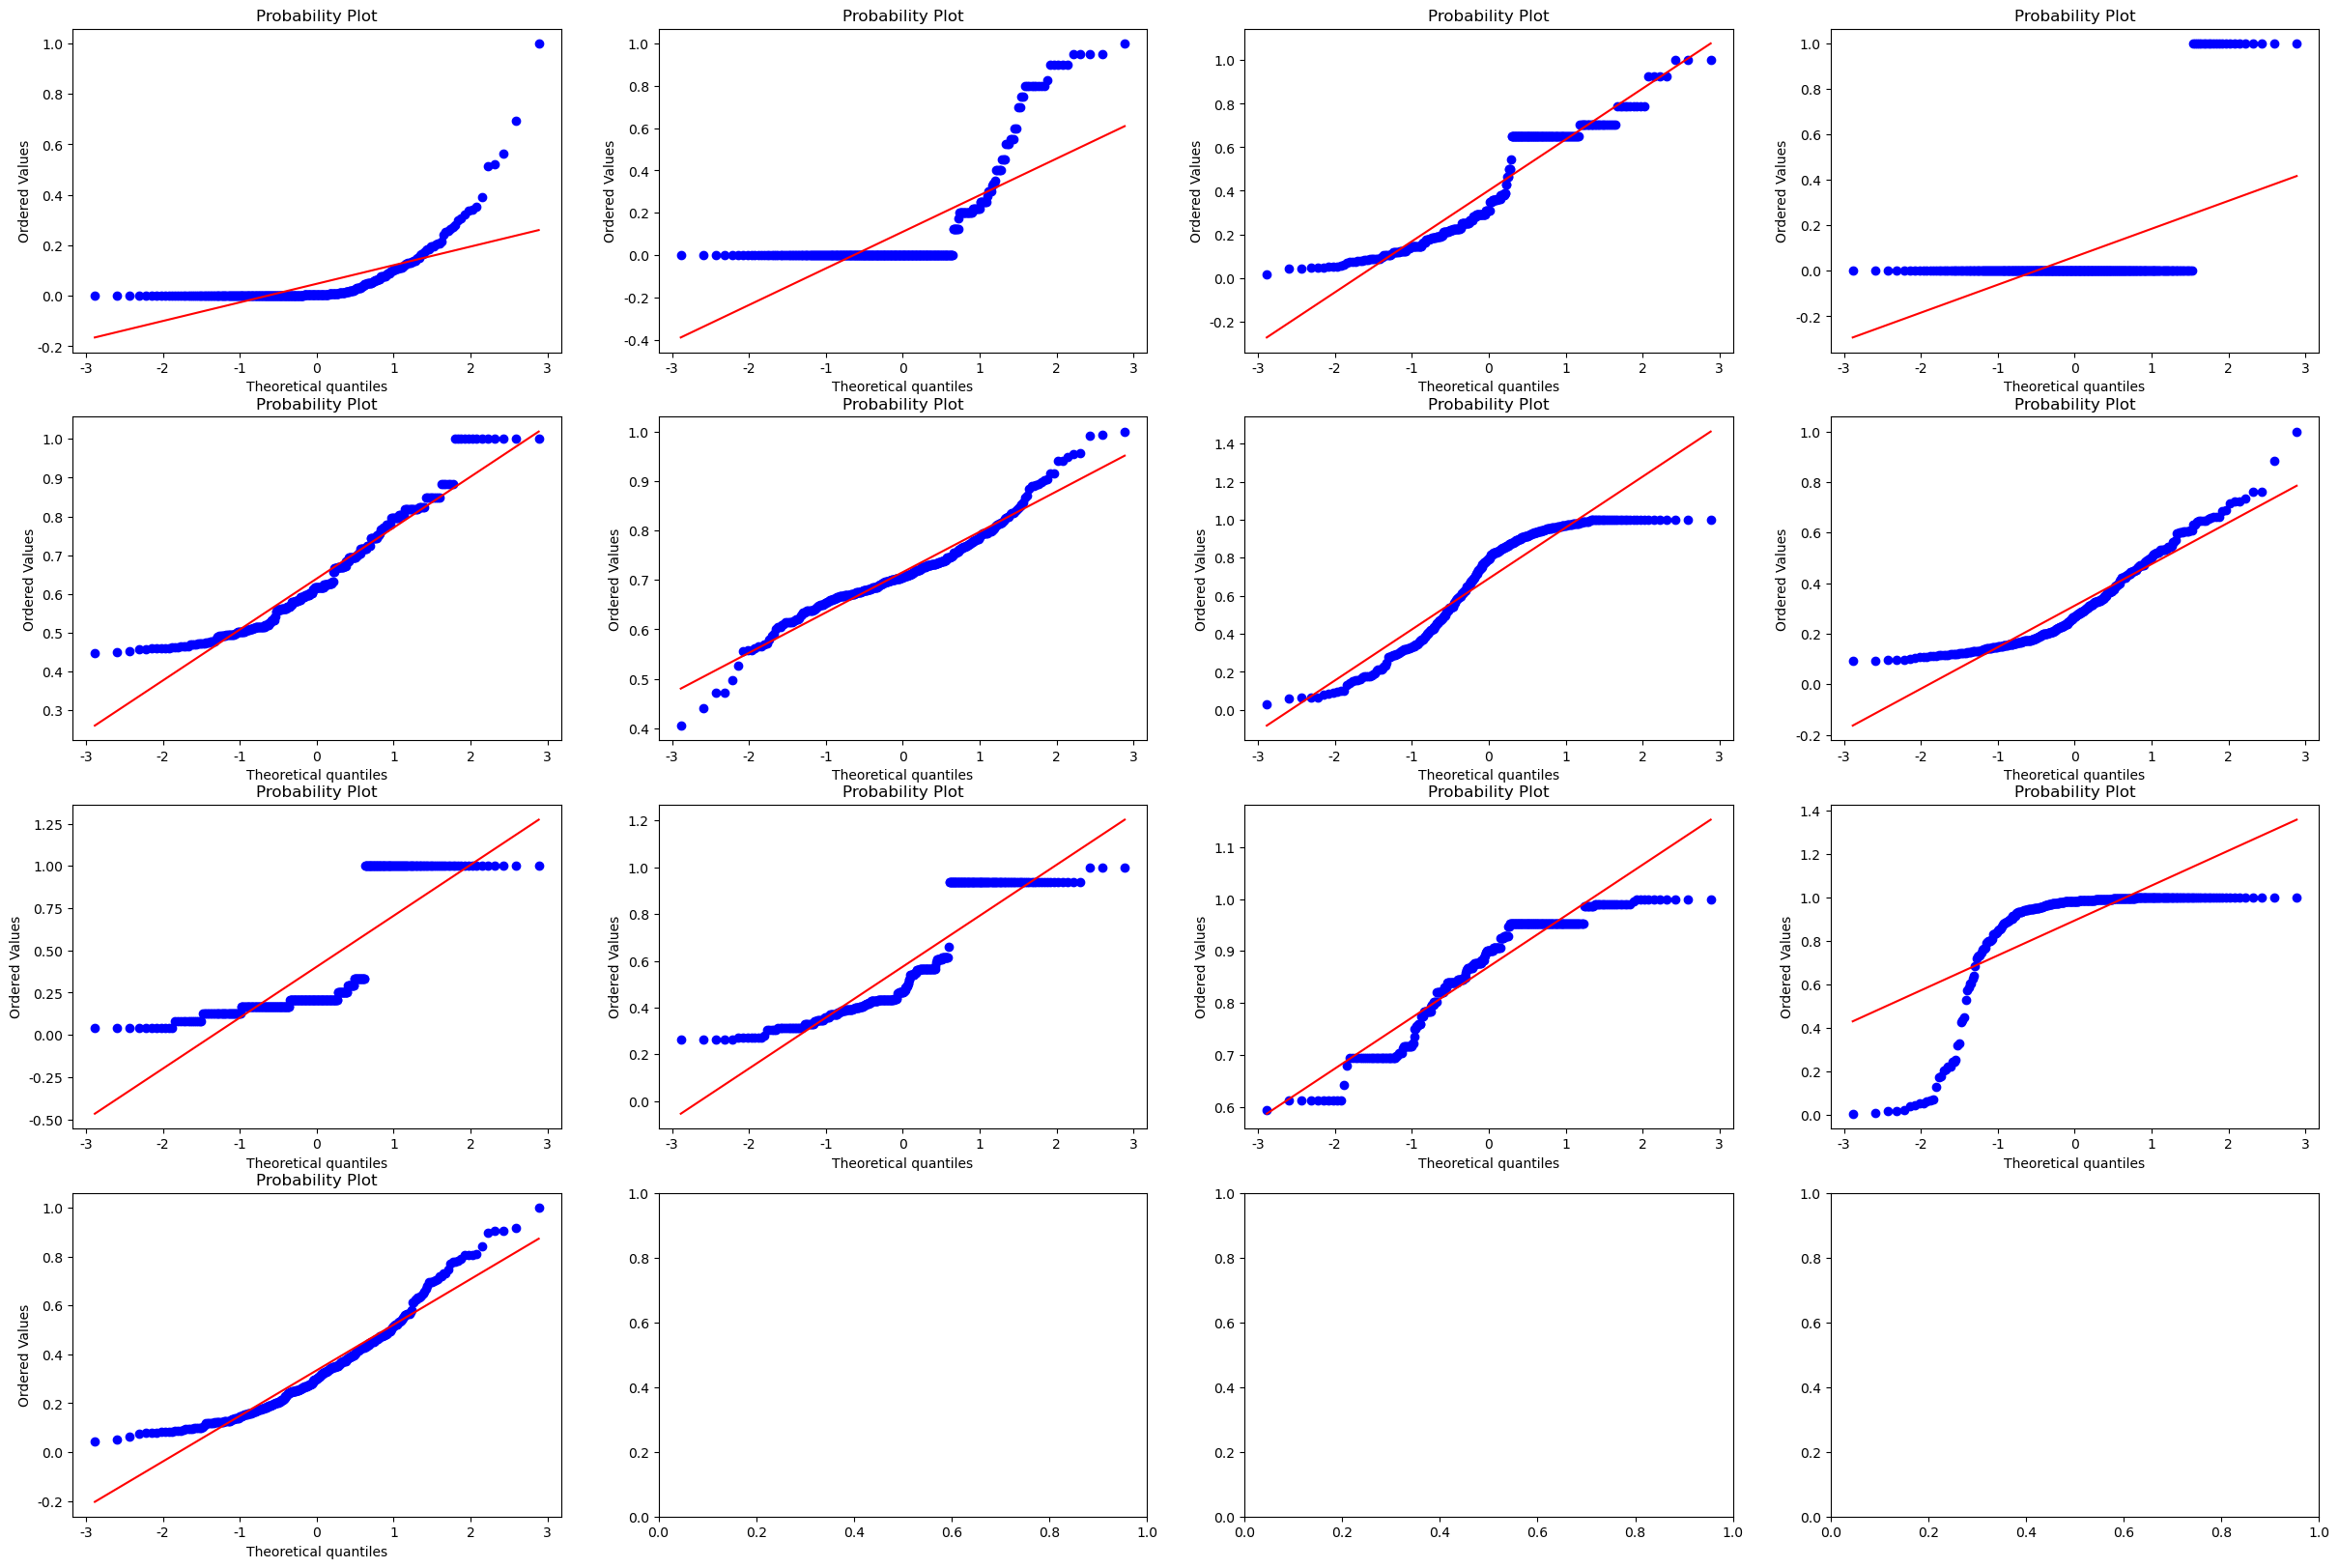

In [30]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    stats.probplot(X_train_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)

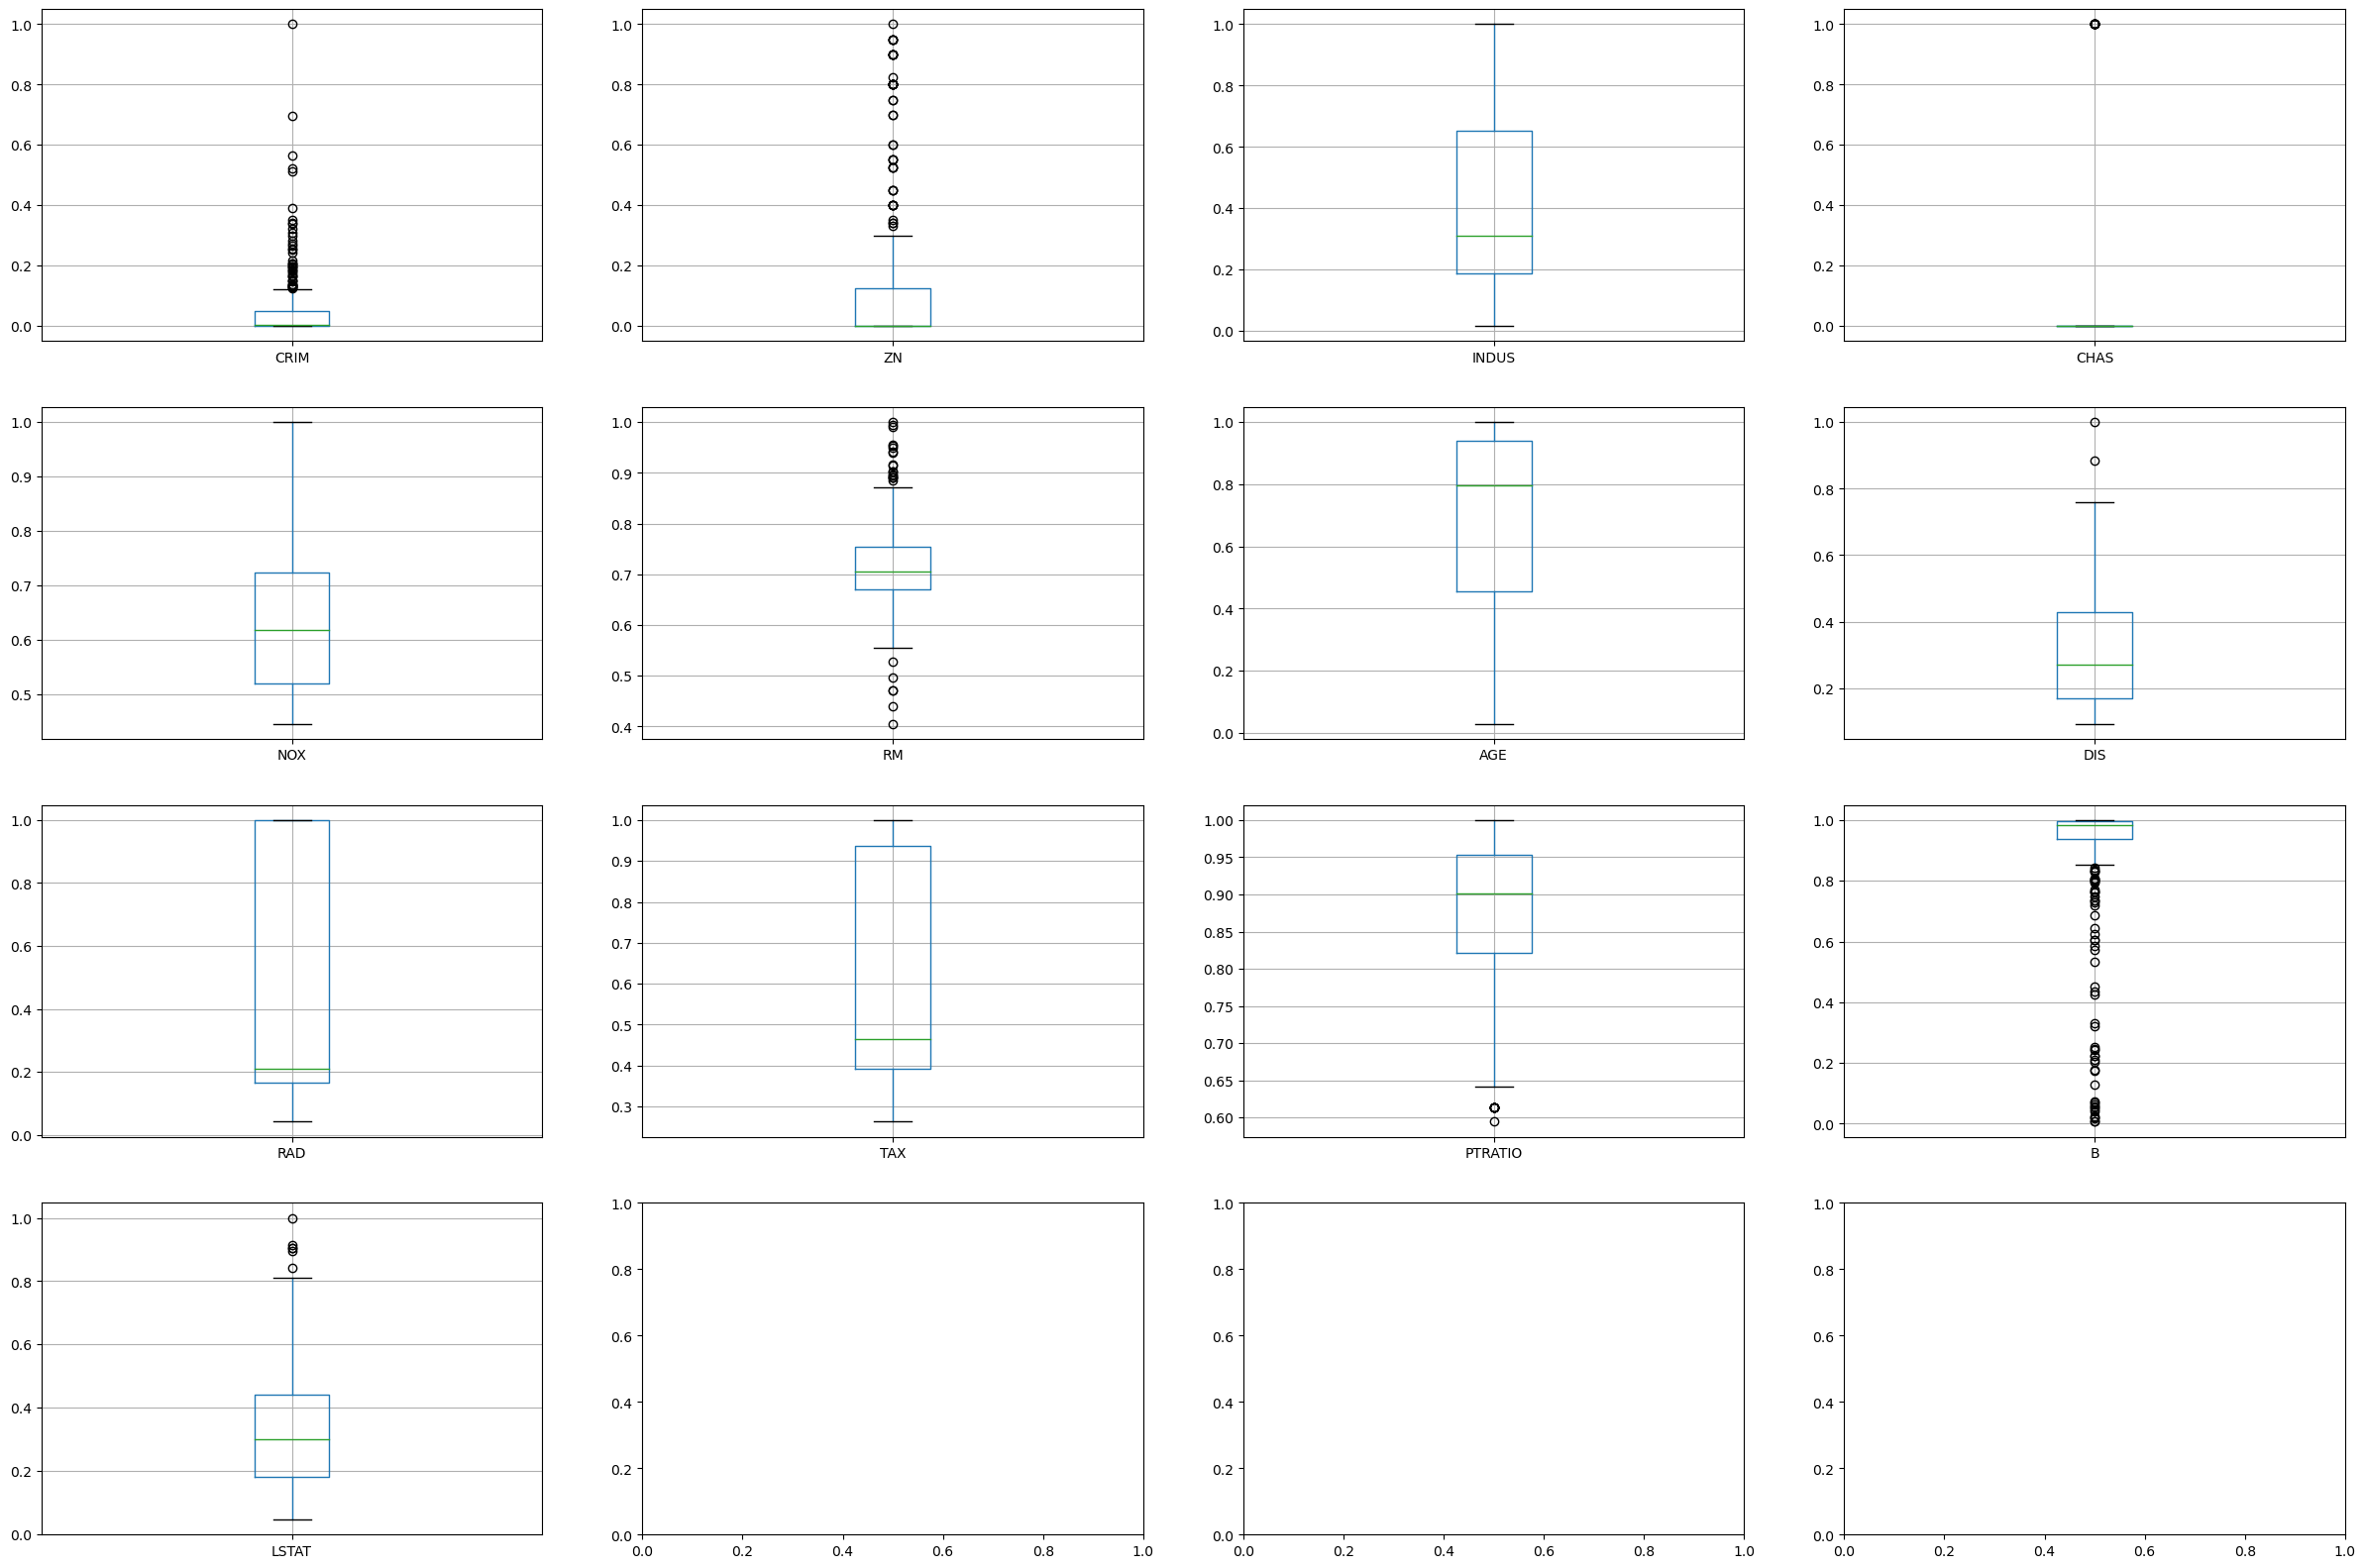

In [31]:
from matplotlib import rc 
col_n = 4
row_n = 4

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    X_train_scaled.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

In [32]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled,  has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     69.77
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.42e-87
Time:                        16:13:29   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     340   BIC:                             2218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9956      6.319      6.487      0.000      28.566      53.425
CRIM          -8.3079      3.759     -2.210      0.028     -15.701      -0.914
ZN             6.5512      1.722      3.804      0.000       3.164       9.939
INDUS          0.9553      2.269      0.421      0.674      -3.507       5.418
CHAS           3.0459      1.149      2.651      0.008       0.786       5.306
NOX          -17.2422      4.152     -4.153      0.000     -25.408      -9.076
RM            29.4566      4.451      6.618      0.000      20.702      38.211
AGE            0.5937      1.618      0.367      0.714      -2.590       3.777
DIS          -21.1226      3.043     -6.941      0.000     -27.109     -15.137
RAD            8.5412      2.058      4.151      0.000       4.494      12.589
TAX          -10.1641      3.499     -2.904      0.004     -17.047      -3.281
PTRATIO      -19.5078      3.575     -5.456      0.000     -26.540     -12.476
B              4.1264      1.405      2.937      0.004       1.363       6.890
LSTAT        -21.4979      2.282     -9.421      0.000     -25.986     -17.010
==============================================================================
Omnibus:                      110.816   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.560
Skew:                           1.390   Prob(JB):                     6.87e-80
Kurtosis:                       7.122   Cond. No.                         65.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

    VIF_Factor  Feature
0     2.528540     CRIM
1     2.751270       ZN
2    15.851254    INDUS
3     1.141505     CHAS
4    69.926944      NOX
5    79.542622       RM
6    20.253389      AGE
7    14.143562      DIS
8    15.880721      RAD
9    65.334714      TAX
10   84.722006  PTRATIO
11   21.601311        B
12   10.246100    LSTAT


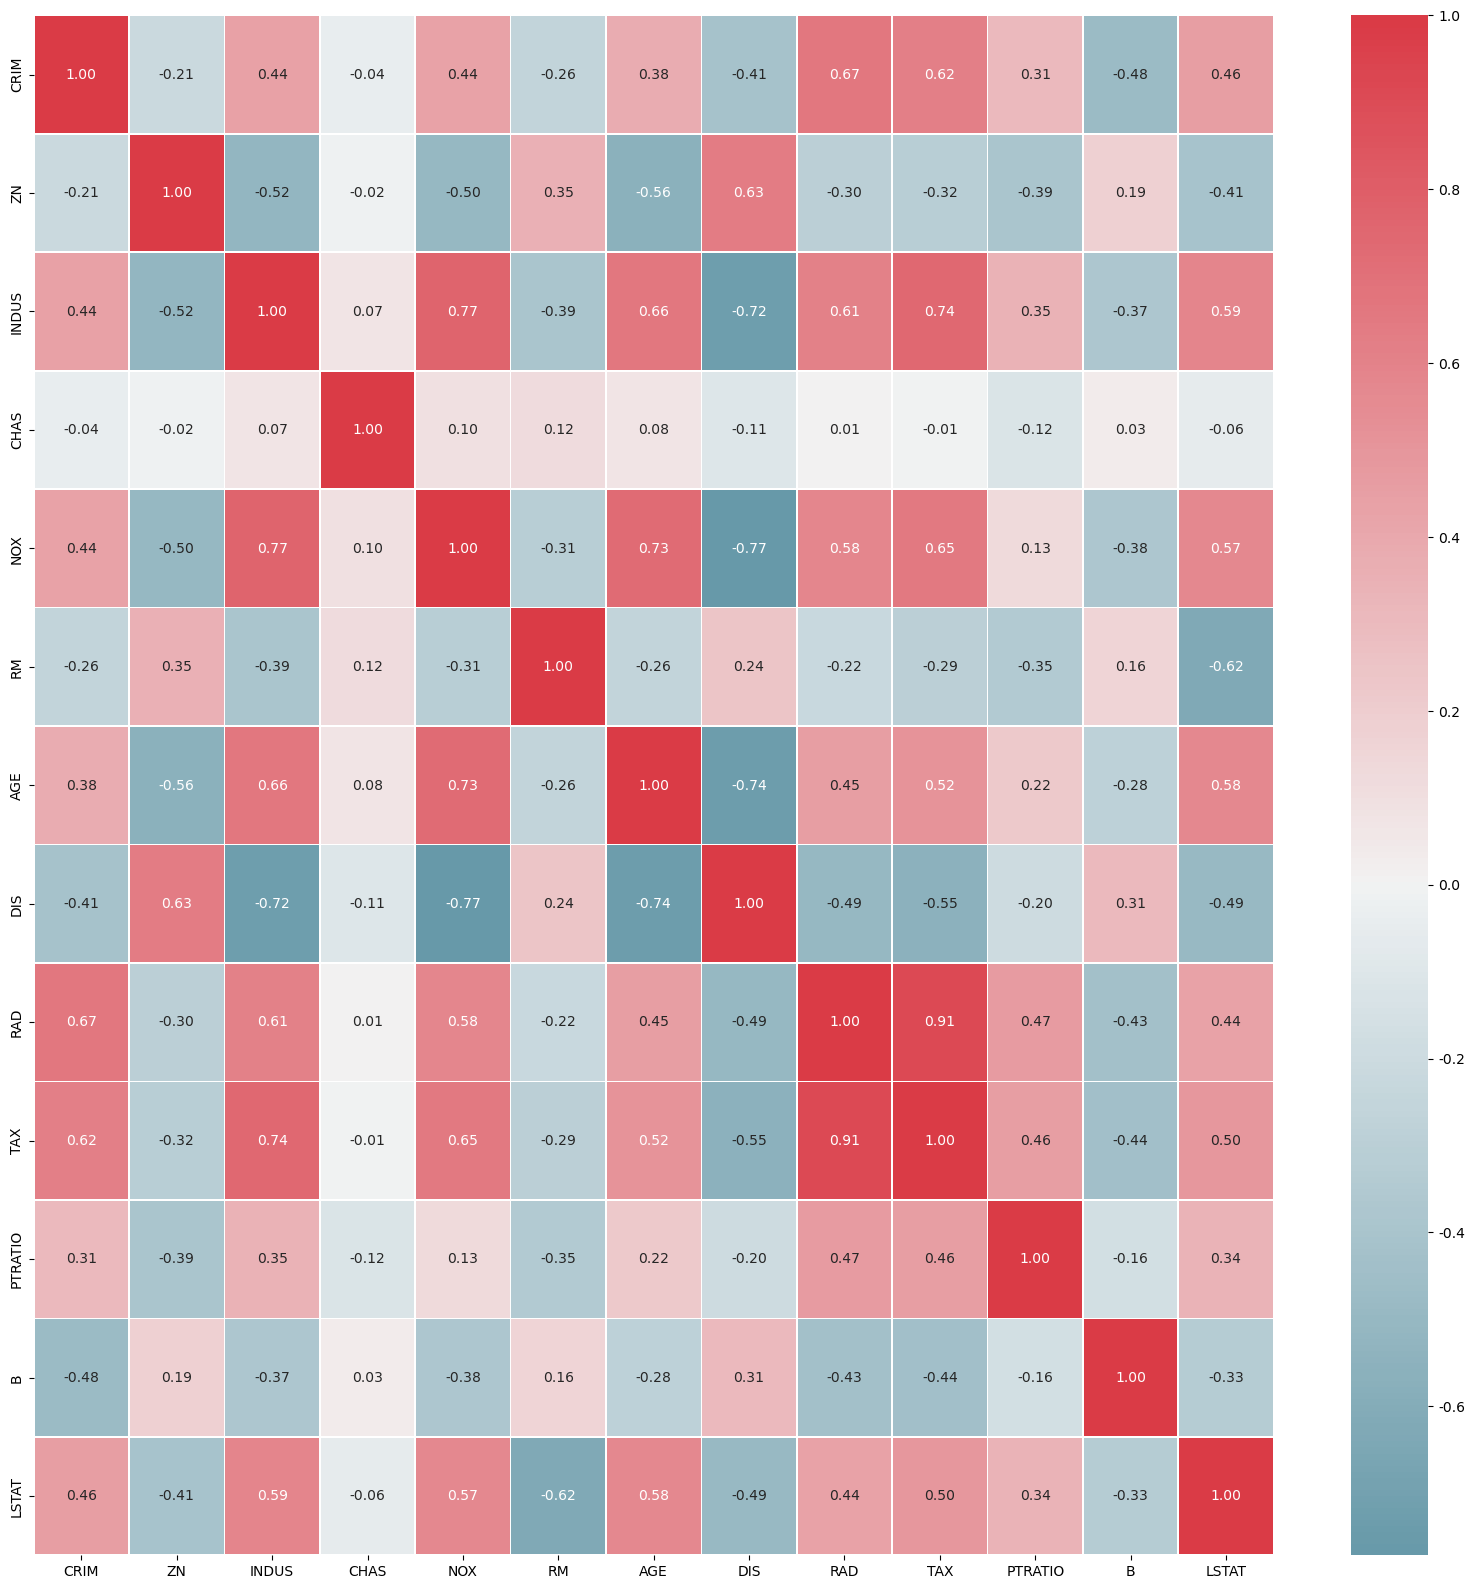

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [35]:
X_train_scaled.drop(['INDUS','AGE'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     82.83
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.01e-89
Time:                        16:13:29   Log-Likelihood:                -1068.1
No. Observations:                 354   AIC:                             2160.
Df Residuals:                     342   BIC:                             2207.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.7481      6.289      6.479      0.000      28.378      53.118
CRIM          -8.3690      3.742     -2.236      0.026     -15.730      -1.008
ZN             6.3764      1.688      3.778      0.000       3.057       9.696
CHAS           3.1058      1.140      2.725      0.007       0.864       5.347
NOX          -16.3967      3.873     -4.233      0.000     -24.015      -8.779
RM            29.5996      4.352      6.801      0.000      21.039      38.160
DIS          -21.7071      2.858     -7.596      0.000     -27.328     -16.086
RAD            8.2653      1.972      4.191      0.000       4.386      12.144
TAX           -9.4291      3.090     -3.052      0.002     -15.507      -3.352
PTRATIO      -19.3094      3.546     -5.445      0.000     -26.285     -12.334
B              4.1281      1.398      2.952      0.003       1.378       6.878
LSTAT        -21.1605      2.172     -9.741      0.000     -25.434     -16.888
==============================================================================
Omnibus:                      112.572   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.664
Skew:                           1.405   Prob(JB):                     9.80e-83
Kurtosis:                       7.208   Cond. No.                         60.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

    VIF_Factor  Feature
0     2.516531     CRIM
1     2.651766       ZN
2     1.128917     CHAS
3    59.641591      NOX
4    74.170738       RM
5    12.011486      DIS
6    14.703007      RAD
7    51.343116      TAX
8    84.097060  PTRATIO
9    21.480716        B
10    9.359484    LSTAT


In [37]:
X_train_scaled.drop(['TAX'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     88.05
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.97e-88
Time:                        16:13:30   Log-Likelihood:                -1072.9
No. Observations:                 354   AIC:                             2168.
Df Residuals:                     343   BIC:                             2210.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0796      6.341      6.163      0.000      26.608      51.551
CRIM          -7.8787      3.784     -2.082      0.038     -15.321      -0.436
ZN             5.3572      1.674      3.200      0.002       2.064       8.650
CHAS           3.3101      1.151      2.875      0.004       1.045       5.575
NOX          -19.1890      3.809     -5.038      0.000     -26.681     -11.697
RM            31.0394      4.379      7.089      0.000      22.427      39.652
DIS          -20.5314      2.866     -7.164      0.000     -26.168     -14.895
RAD            3.6120      1.266      2.854      0.005       1.123       6.101
PTRATIO      -21.1337      3.538     -5.974      0.000     -28.092     -14.175
B              4.3780      1.413      3.099      0.002       1.599       7.156
LSTAT        -21.2998      2.198     -9.690      0.000     -25.623     -16.976
==============================================================================
Omnibus:                      103.831   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.547
Skew:                           1.318   Prob(JB):                     5.53e-71
Kurtosis:                       6.871   Cond. No.                         57.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

   VIF_Factor  Feature
0    2.514065     CRIM
1    2.541360       ZN
2    1.124970     CHAS
3   52.221785      NOX
4   73.832610       RM
5   11.868096      DIS
6    5.664667      RAD
7   77.398903  PTRATIO
8   21.453220        B
9    9.343474    LSTAT


In [39]:
X_train_scaled.drop(['PTRATIO'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     85.27
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           4.13e-82
Time:                        16:13:30   Log-Likelihood:                -1090.4
No. Observations:                 354   AIC:                             2201.
Df Residuals:                     344   BIC:                             2240.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8339      5.111      2.902      0.004       4.781      24.887
CRIM          -6.8782      3.966     -1.734      0.084     -14.679       0.923
ZN             8.8701      1.645      5.393      0.000       5.635      12.105
CHAS           3.7781      1.205      3.135      0.002       1.407       6.149
NOX          -11.5692      3.765     -3.072      0.002     -18.975      -4.163
RM            35.1246      4.538      7.740      0.000      26.199      44.050
DIS          -21.1186      3.005     -7.028      0.000     -27.029     -15.208
RAD            0.0342      1.170      0.029      0.977      -2.267       2.335
B              4.1547      1.482      2.804      0.005       1.241       7.069
LSTAT        -23.0165      2.286    -10.066      0.000     -27.514     -18.519
==============================================================================
Omnibus:                       90.945   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.119
Skew:                           1.212   Prob(JB):                     4.38e-53
Kurtosis:                       6.236   Cond. No.                         43.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

   VIF_Factor Feature
0    2.506262    CRIM
1    2.146580      ZN
2    1.114904    CHAS
3   51.681638     NOX
4   56.228443      RM
5    9.842512     DIS
6    4.977285     RAD
7   19.824089       B
8    8.095353   LSTAT


In [42]:
X_train_scaled.drop(['RAD'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     96.21
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           4.08e-83
Time:                        16:13:45   Log-Likelihood:                -1090.4
No. Observations:                 354   AIC:                             2199.
Df Residuals:                     345   BIC:                             2234.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8241      5.093      2.911      0.004       4.807      24.841
CRIM          -6.8202      3.429     -1.989      0.047     -13.564      -0.077
ZN             8.8689      1.642      5.402      0.000       5.640      12.098
CHAS           3.7777      1.203      3.139      0.002       1.411       6.145
NOX          -11.5376      3.601     -3.204      0.001     -18.621      -4.454
RM            35.1299      4.528      7.759      0.000      26.225      44.035
DIS          -21.1187      3.001     -7.038      0.000     -27.021     -15.217
B              4.1512      1.474      2.815      0.005       1.251       7.051
LSTAT        -23.0161      2.283    -10.081      0.000     -27.507     -18.526
==============================================================================
Omnibus:                       91.128   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.028
Skew:                           1.213   Prob(JB):                     2.78e-53
Kurtosis:                       6.243   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

   VIF_Factor Feature
0    1.886370    CRIM
1    2.146335      ZN
2    1.114856    CHAS
3   46.931115     NOX
4   56.215895      RM
5    9.822968     DIS
6   19.556270       B
7    8.091208   LSTAT


In [44]:
X_train_scaled.drop(['RM'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     86.54
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.71e-72
Time:                        16:14:06   Log-Likelihood:                -1118.9
No. Observations:                 354   AIC:                             2254.
Df Residuals:                     346   BIC:                             2285.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.8002      3.591     12.475      0.000      37.737      51.863
CRIM          -7.7290      3.708     -2.084      0.038     -15.022      -0.436
ZN            11.7045      1.732      6.757      0.000       8.298      15.111
CHAS           4.5345      1.298      3.493      0.001       1.981       7.088
NOX          -11.9135      3.897     -3.057      0.002     -19.578      -4.249
DIS          -24.7154      3.208     -7.704      0.000     -31.026     -18.405
B              3.4708      1.593      2.179      0.030       0.338       6.604
LSTAT        -32.5033      2.087    -15.578      0.000     -36.607     -28.399
==============================================================================
Omnibus:                       80.590   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.936
Skew:                           1.267   Prob(JB):                     3.37e-32
Kurtosis:                       4.845   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

   VIF_Factor Feature
0    1.870367    CRIM
1    2.122241      ZN
2    1.112285    CHAS
3   18.913560     NOX
4    7.503808     DIS
5   16.529208       B
6    6.893194   LSTAT


In [47]:
X_train_scaled.drop(['B'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     99.10
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.70e-72
Time:                        16:14:33   Log-Likelihood:                -1121.3
No. Observations:                 354   AIC:                             2257.
Df Residuals:                     347   BIC:                             2284.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9451      3.062     15.983      0.000      42.922      54.968
CRIM         -10.5435      3.495     -3.017      0.003     -17.417      -3.670
ZN            11.7040      1.742      6.721      0.000       8.279      15.129
CHAS           4.6390      1.304      3.557      0.000       2.074       7.204
NOX          -13.1597      3.875     -3.396      0.001     -20.782      -5.537
DIS          -24.8465      3.225     -7.704      0.000     -31.190     -18.503
LSTAT        -32.7160      2.095    -15.613      0.000     -36.837     -28.595
==============================================================================
Omnibus:                       78.940   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.585
Skew:                           1.247   Prob(JB):                     2.97e-31
Kurtosis:                       4.819   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

   VIF_Factor Feature
0    1.678045    CRIM
1    2.119626      ZN
2    1.110548    CHAS
3   10.030103     NOX
4    5.304696     DIS
5    6.869845   LSTAT


In [50]:
X_train_scaled.drop(['NOX'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     113.2
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           9.22e-71
Time:                        16:14:53   Log-Likelihood:                -1127.1
No. Observations:                 354   AIC:                             2266.
Df Residuals:                     348   BIC:                             2289.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.3503      1.199     32.832      0.000      36.993      41.708
CRIM         -11.7371      3.529     -3.326      0.001     -18.678      -4.796
ZN            11.6341      1.768      6.582      0.000       8.158      15.110
CHAS           4.2798      1.319      3.244      0.001       1.685       6.875
DIS          -18.3699      2.640     -6.959      0.000     -23.561     -13.178
LSTAT        -34.9612      2.018    -17.322      0.000     -38.931     -30.992
==============================================================================
Omnibus:                       76.790   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.972
Skew:                           1.233   Prob(JB):                     1.33e-29
Kurtosis:                       4.712   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

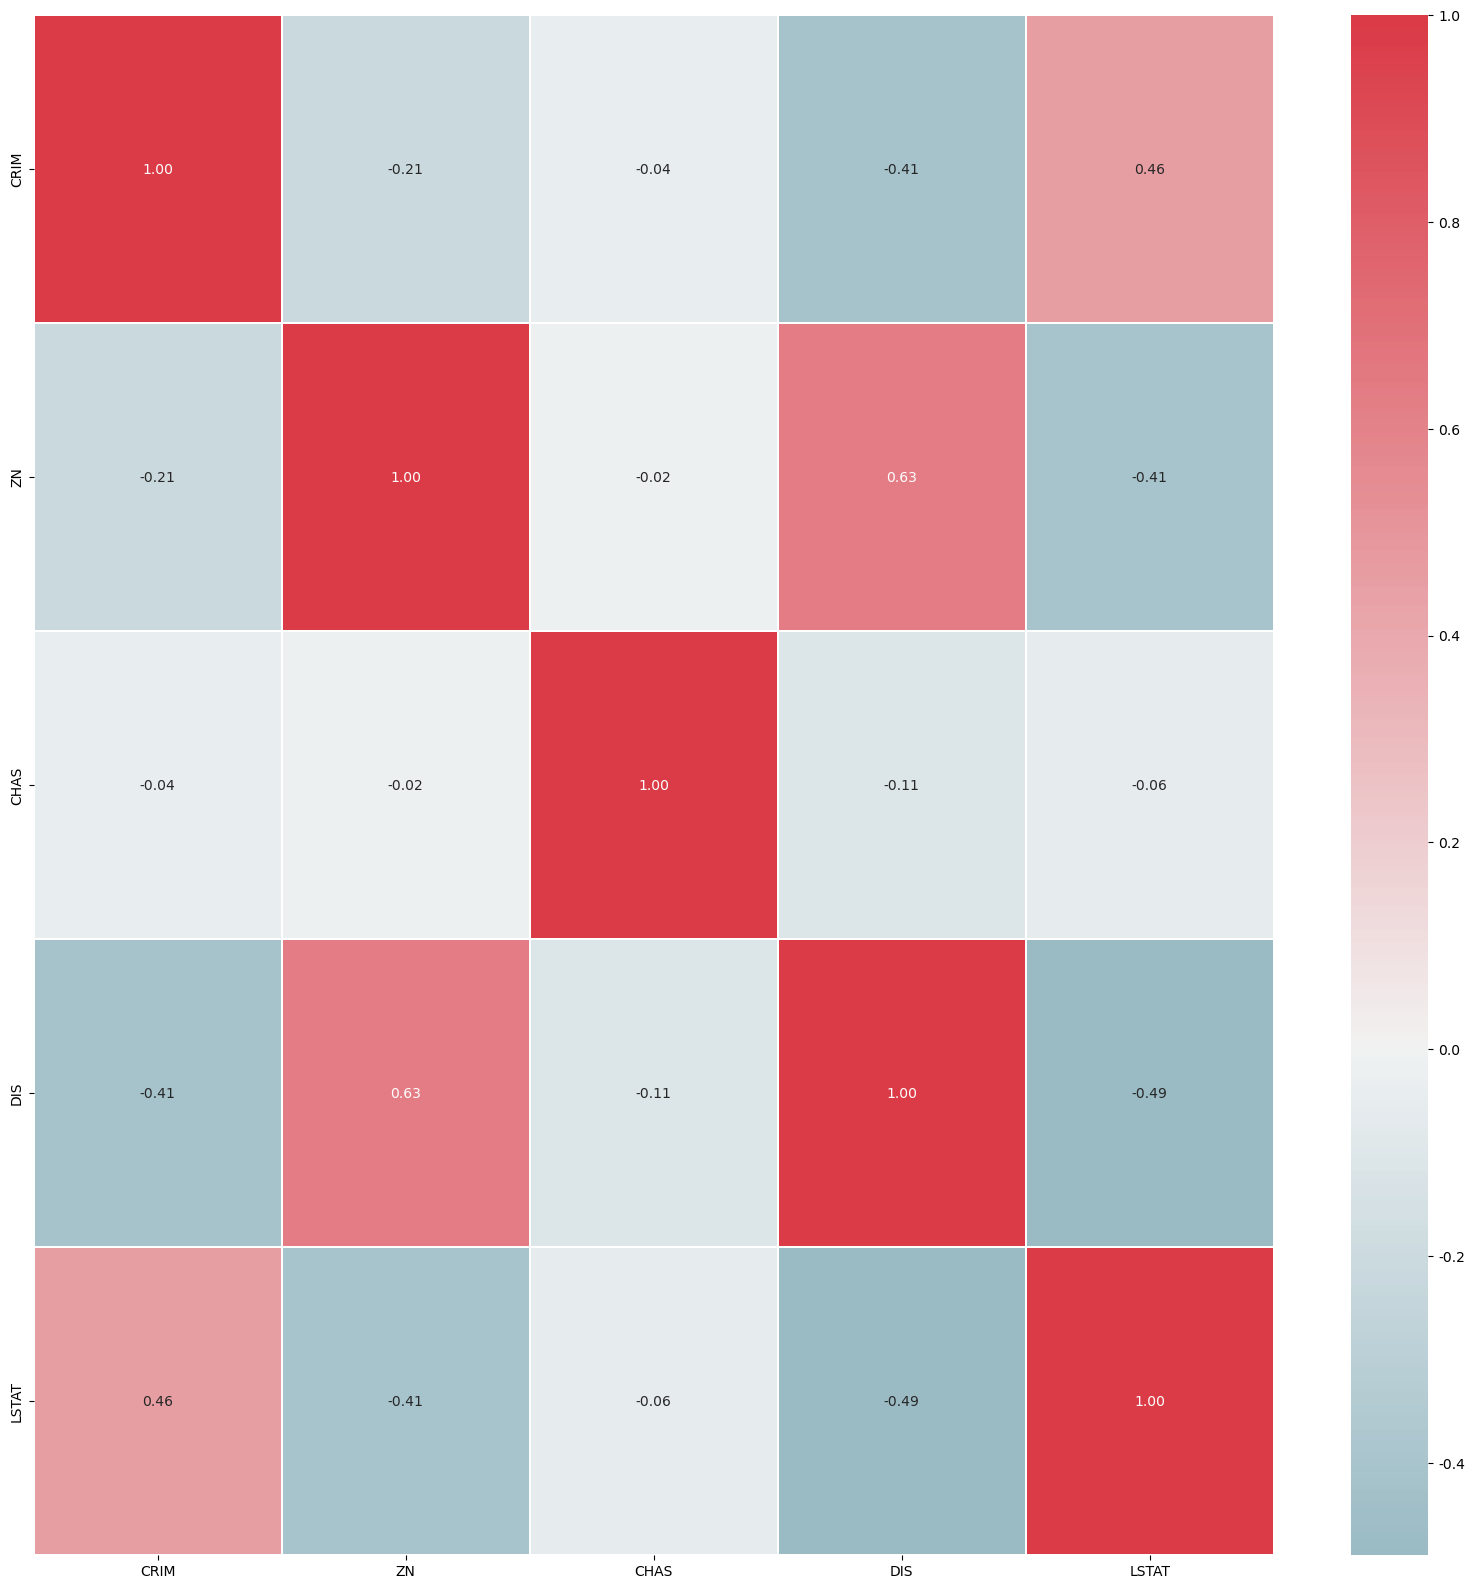

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [53]:
X_train_scaled.columns
X_test_scaled= X_test_scaled[['CRIM', 'ZN', 'CHAS', 'DIS', 'LSTAT']]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 29.975, RMSE : 5.475
Variance score : 0.579
절편 값: [39.35029855]
회귀 계수값: [[-11.7371  11.6341   4.2798 -18.3699 -34.9612]]
